In [2]:
library(readr)
library(xts)
library(zoo)

d <- read_table(
  "data/m-3m4608.txt",
  col_types = cols(
    .default = col_double(),
    date = col_date(format = "%Y%m%d")
  )
)

mmm <- xts(log1p(d[["rtn"]]), order.by = d$date)
rm(d)

tclass(mmm) <- "yearmon"
ts.3m <- ts(coredata(mmm), start = c(1946, 2), frequency = 12)

head(ts.3m)

Series 1
-0.081125460
0.018421282
-0.105360516
0.190518702
0.005114897
0.073743834


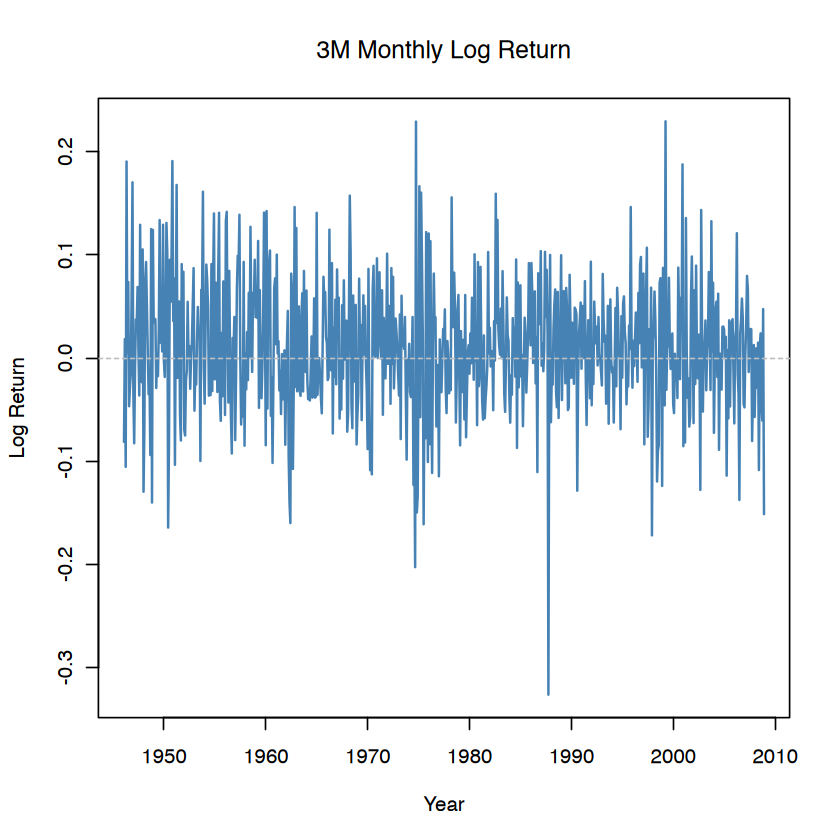

In [5]:
plot(
  ts.3m,
  main = "3M Monthly Log Return",
  ylab = "Log Return",
  xlab = "Year",
  col = "steelblue",
  lwd = 1.5
)
abline(h = 0, col = "gray", lty = 2)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



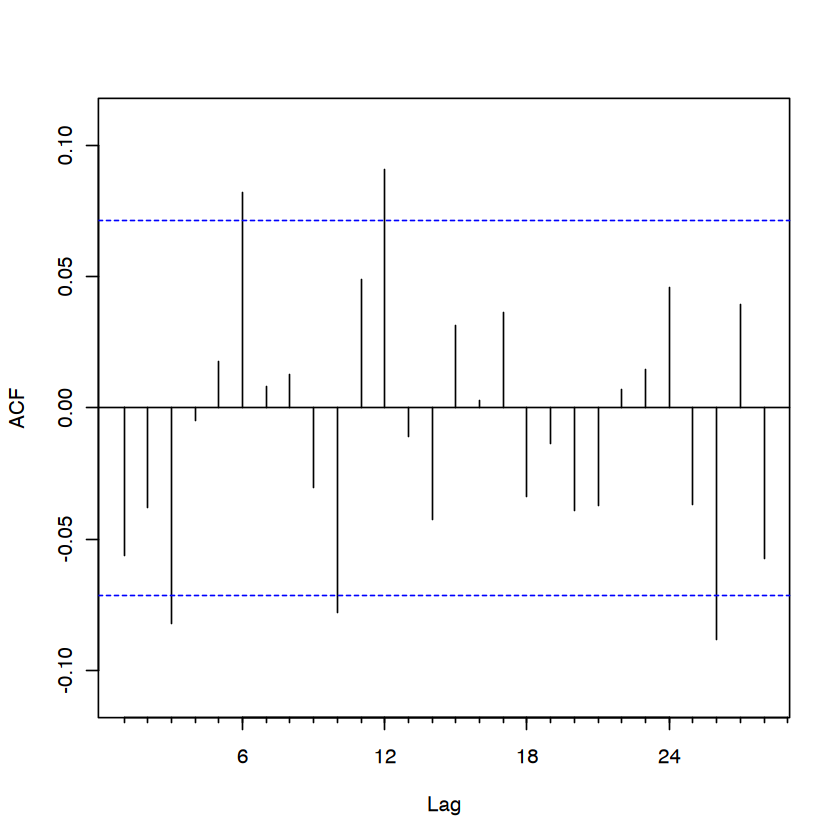

In [6]:
forecast::Acf(ts.3m, main = "")

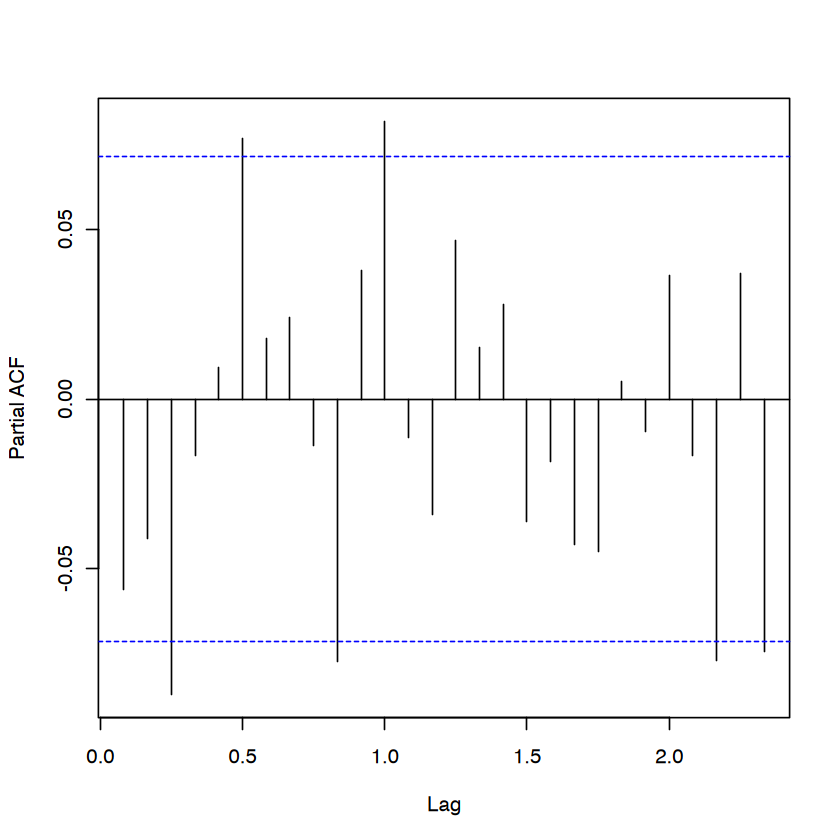

In [ ]:
pacf(ts.3m, main = "")

In [ ]:
TSA::eacf(ts.3m, 6, 12)

# AR/MA
#   0 1 2 3 4 5 6 7 8 9 10 11 12
# 0 o o x o o x o o o x o  x  o 
# 1 x o x o o x o o o o o  x  o 
# 2 x x x o o x o o o o o  o  o 
# 3 x x x o o o o o o o o  o  o 
# 4 x o x o o o o o o o o  o  o 
# 5 x x x o x o o o o o o  o  o 
# 6 x x x x x o o o o o o  o  o

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12
0 o o x o o x o o o x o  x  o 
1 x o x o o x o o o o o  x  o 
2 x x x o o x o o o o o  o  o 
3 x x x o o o o o o o o  o  o 
4 x o x o o o o o o o o  o  o 
5 x x x o x o o o o o o  o  o 
6 x x x x x o o o o o o  o  o 


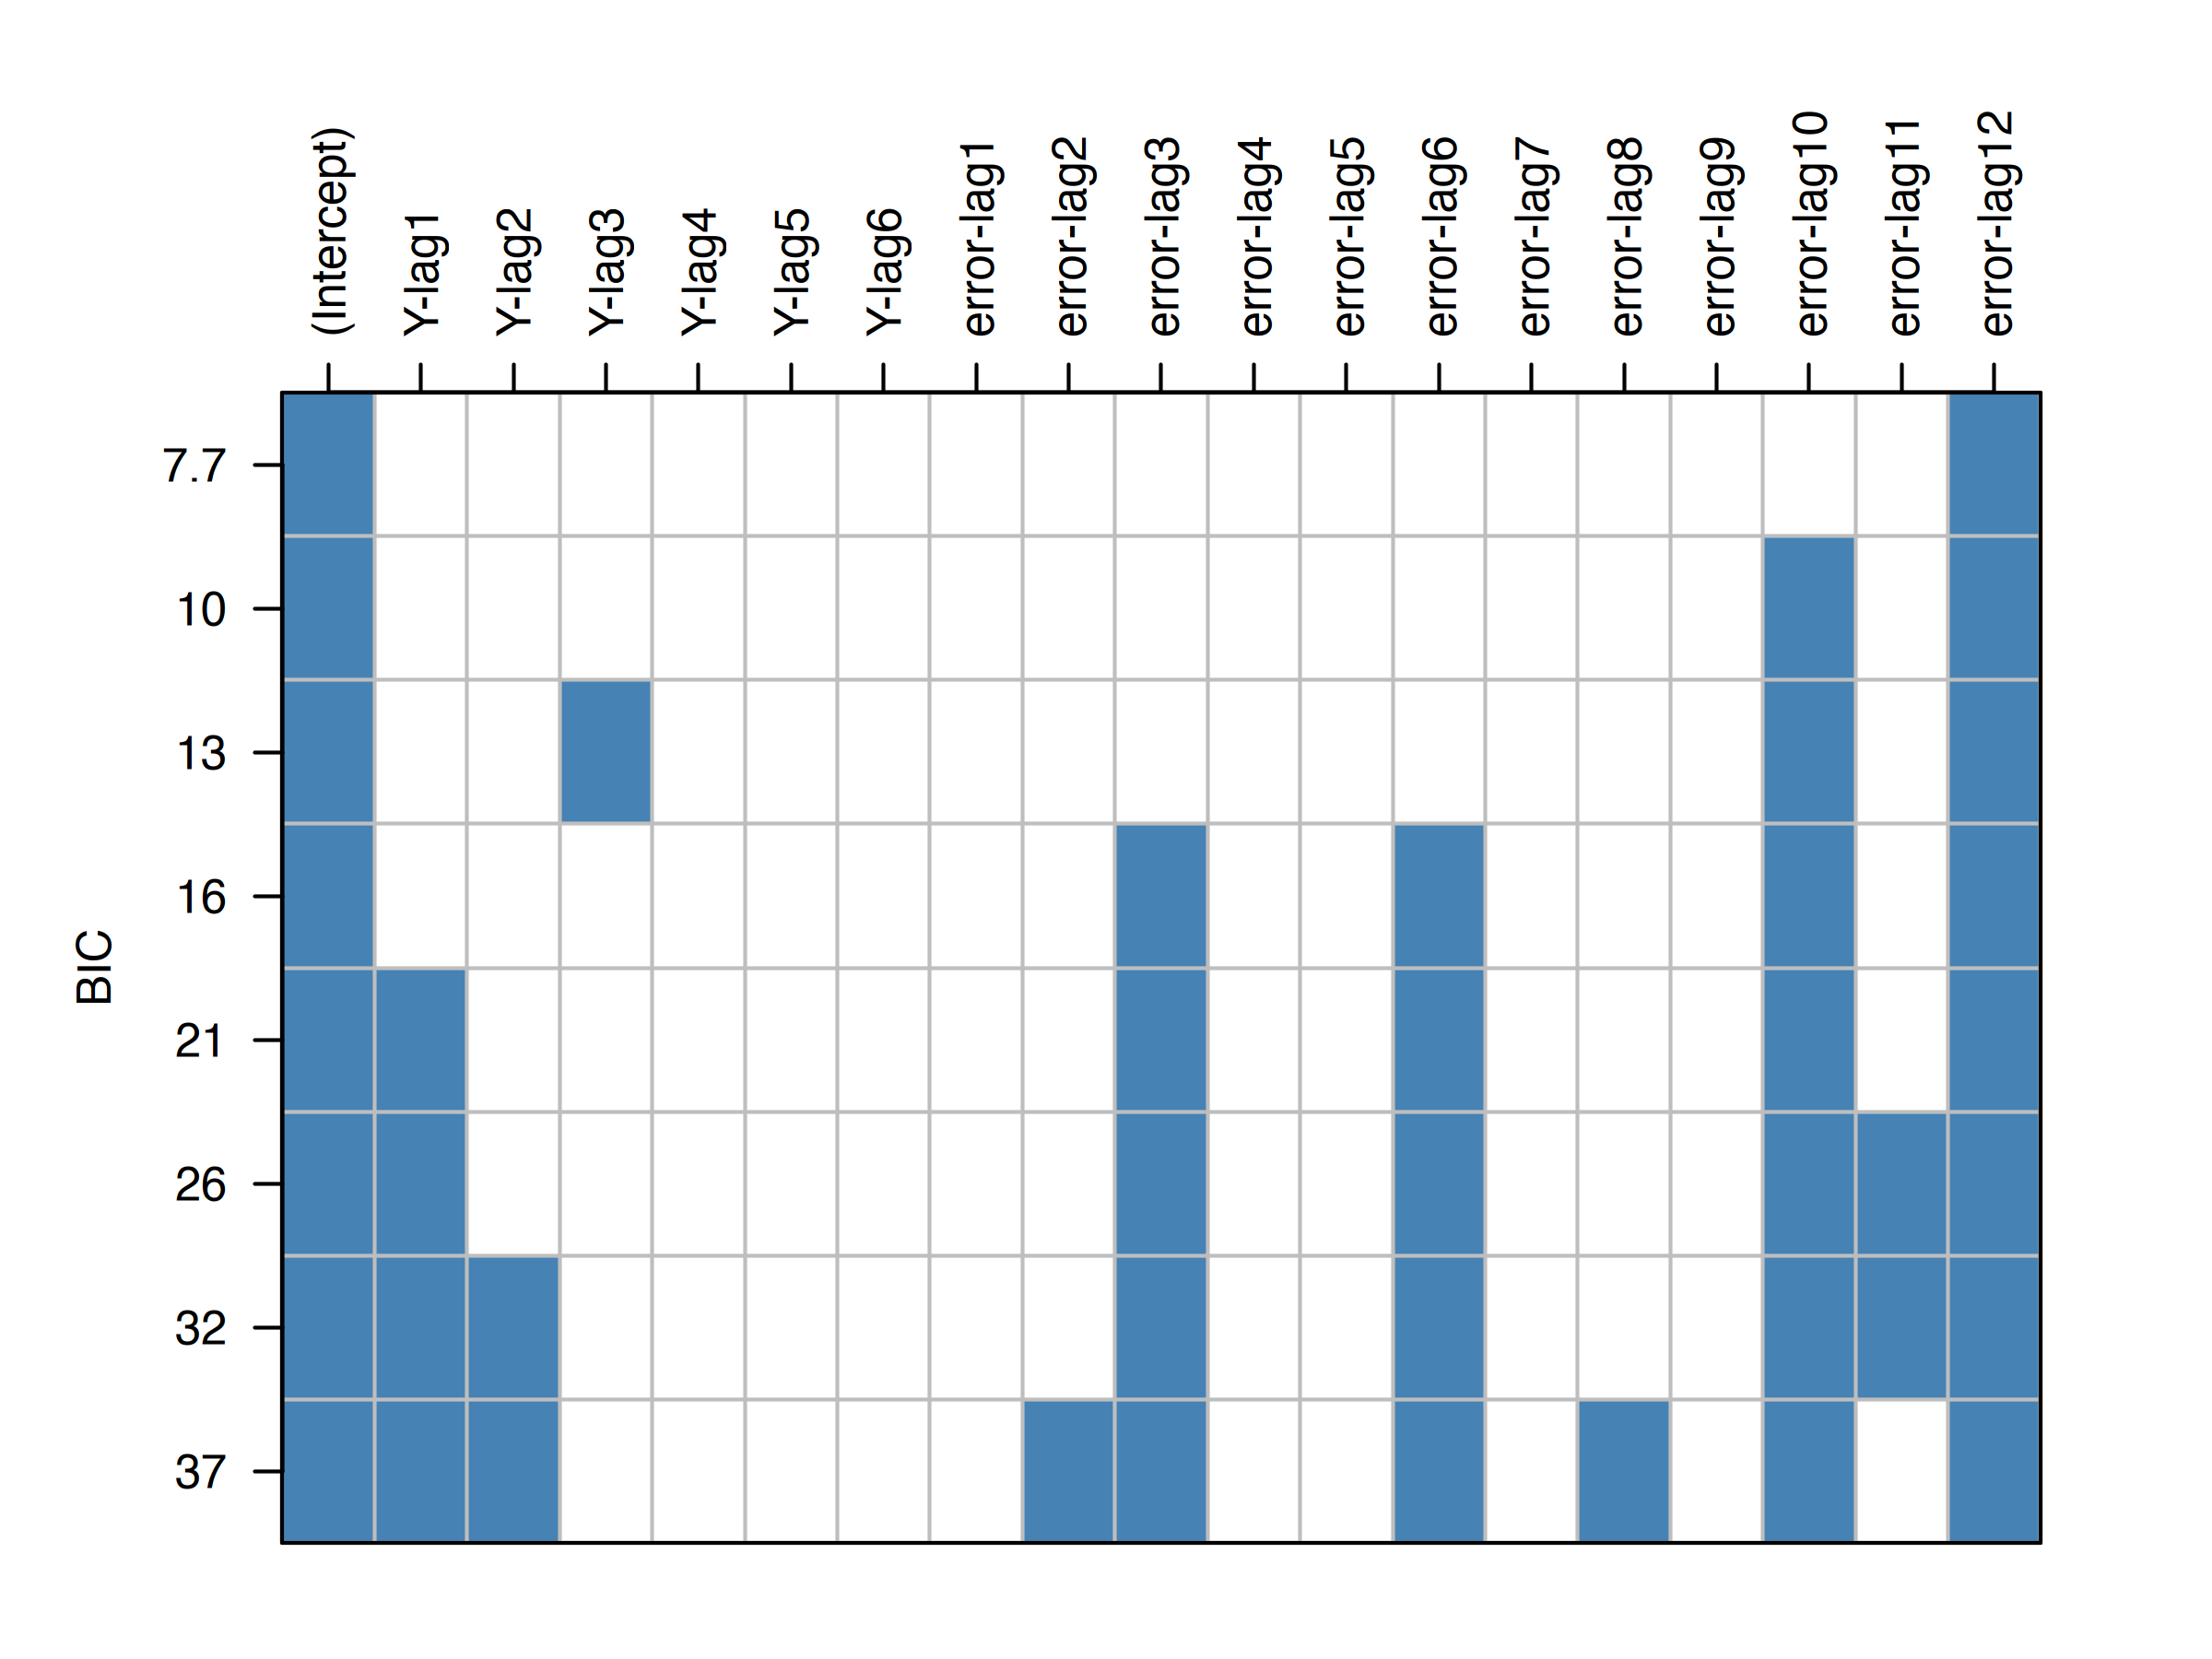

In [18]:
resr <- TSA::armasubsets(ts.3m, nar = 6, nma = 12)
# 调整画布大小
options(repr.plot.width = 8, repr.plot.height = 6)
# 调整分辨率
options(repr.plot.res = 300)
plot(
  resr,
  main = "",
  xlab = "Number of MA Terms",
  ylab = "Number of AR Terms",
  col = "steelblue"
)

In [ ]:
fit <- forecast::auto.arima(
  ts.3m,
  max.p = 6, max.q = 6,
  max.P = 1, max.Q = 1
)
fit

# Series: ts.3m 
# ARIMA(3,0,1)(1,0,1)[12] with non-zero mean 

# Coefficients:
#          ar1      ar2      ar3      ma1    sar1     sma1    mean
#       0.0453  -0.0285  -0.0837  -0.1124  0.5319  -0.4435  0.0103
# s.e.  0.3146   0.0417   0.0387   0.3147  0.2885   0.3049  0.0023

# sigma^2 = 0.003998:  log likelihood = 1016.63
# AIC=-2017.25   AICc=-2017.06   BIC=-1980.24

Series: ts.3m 
ARIMA(3,0,1)(1,0,1)[12] with non-zero mean 

Coefficients:
         ar1      ar2      ar3      ma1    sar1     sma1    mean
      0.0453  -0.0285  -0.0837  -0.1124  0.5319  -0.4435  0.0103
s.e.  0.3146   0.0417   0.0387   0.3147  0.2885   0.3049  0.0023

sigma^2 = 0.003998:  log likelihood = 1016.63
AIC=-2017.25   AICc=-2017.06   BIC=-1980.24

In [ ]:
arima(
  ts.3m,
  order = c(3, 0, 1),
  seasonal = list(order = c(1, 0, 1), period = 12)
)

# Call:
# arima(x = ts.3m, order = c(3, 0, 1), seasonal = list(order = c(1, 0, 1), period = 12))

# Coefficients:
#          ar1      ar2      ar3      ma1    sar1     sma1  intercept
#       0.0453  -0.0285  -0.0837  -0.1124  0.5319  -0.4435     0.0103
# s.e.  0.3146   0.0417   0.0387   0.3147  0.2885   0.3049     0.0023

# sigma^2 estimated as 0.003961:  log likelihood = 1016.63,  aic = -2017.25


Call:
arima(x = ts.3m, order = c(3, 0, 1), seasonal = list(order = c(1, 0, 1), period = 12))

Coefficients:
         ar1      ar2      ar3      ma1    sar1     sma1  intercept
      0.0453  -0.0285  -0.0837  -0.1124  0.5319  -0.4435     0.0103
s.e.  0.3146   0.0417   0.0387   0.3147  0.2885   0.3049     0.0023

sigma^2 estimated as 0.003961:  log likelihood = 1016.63,  aic = -2017.25

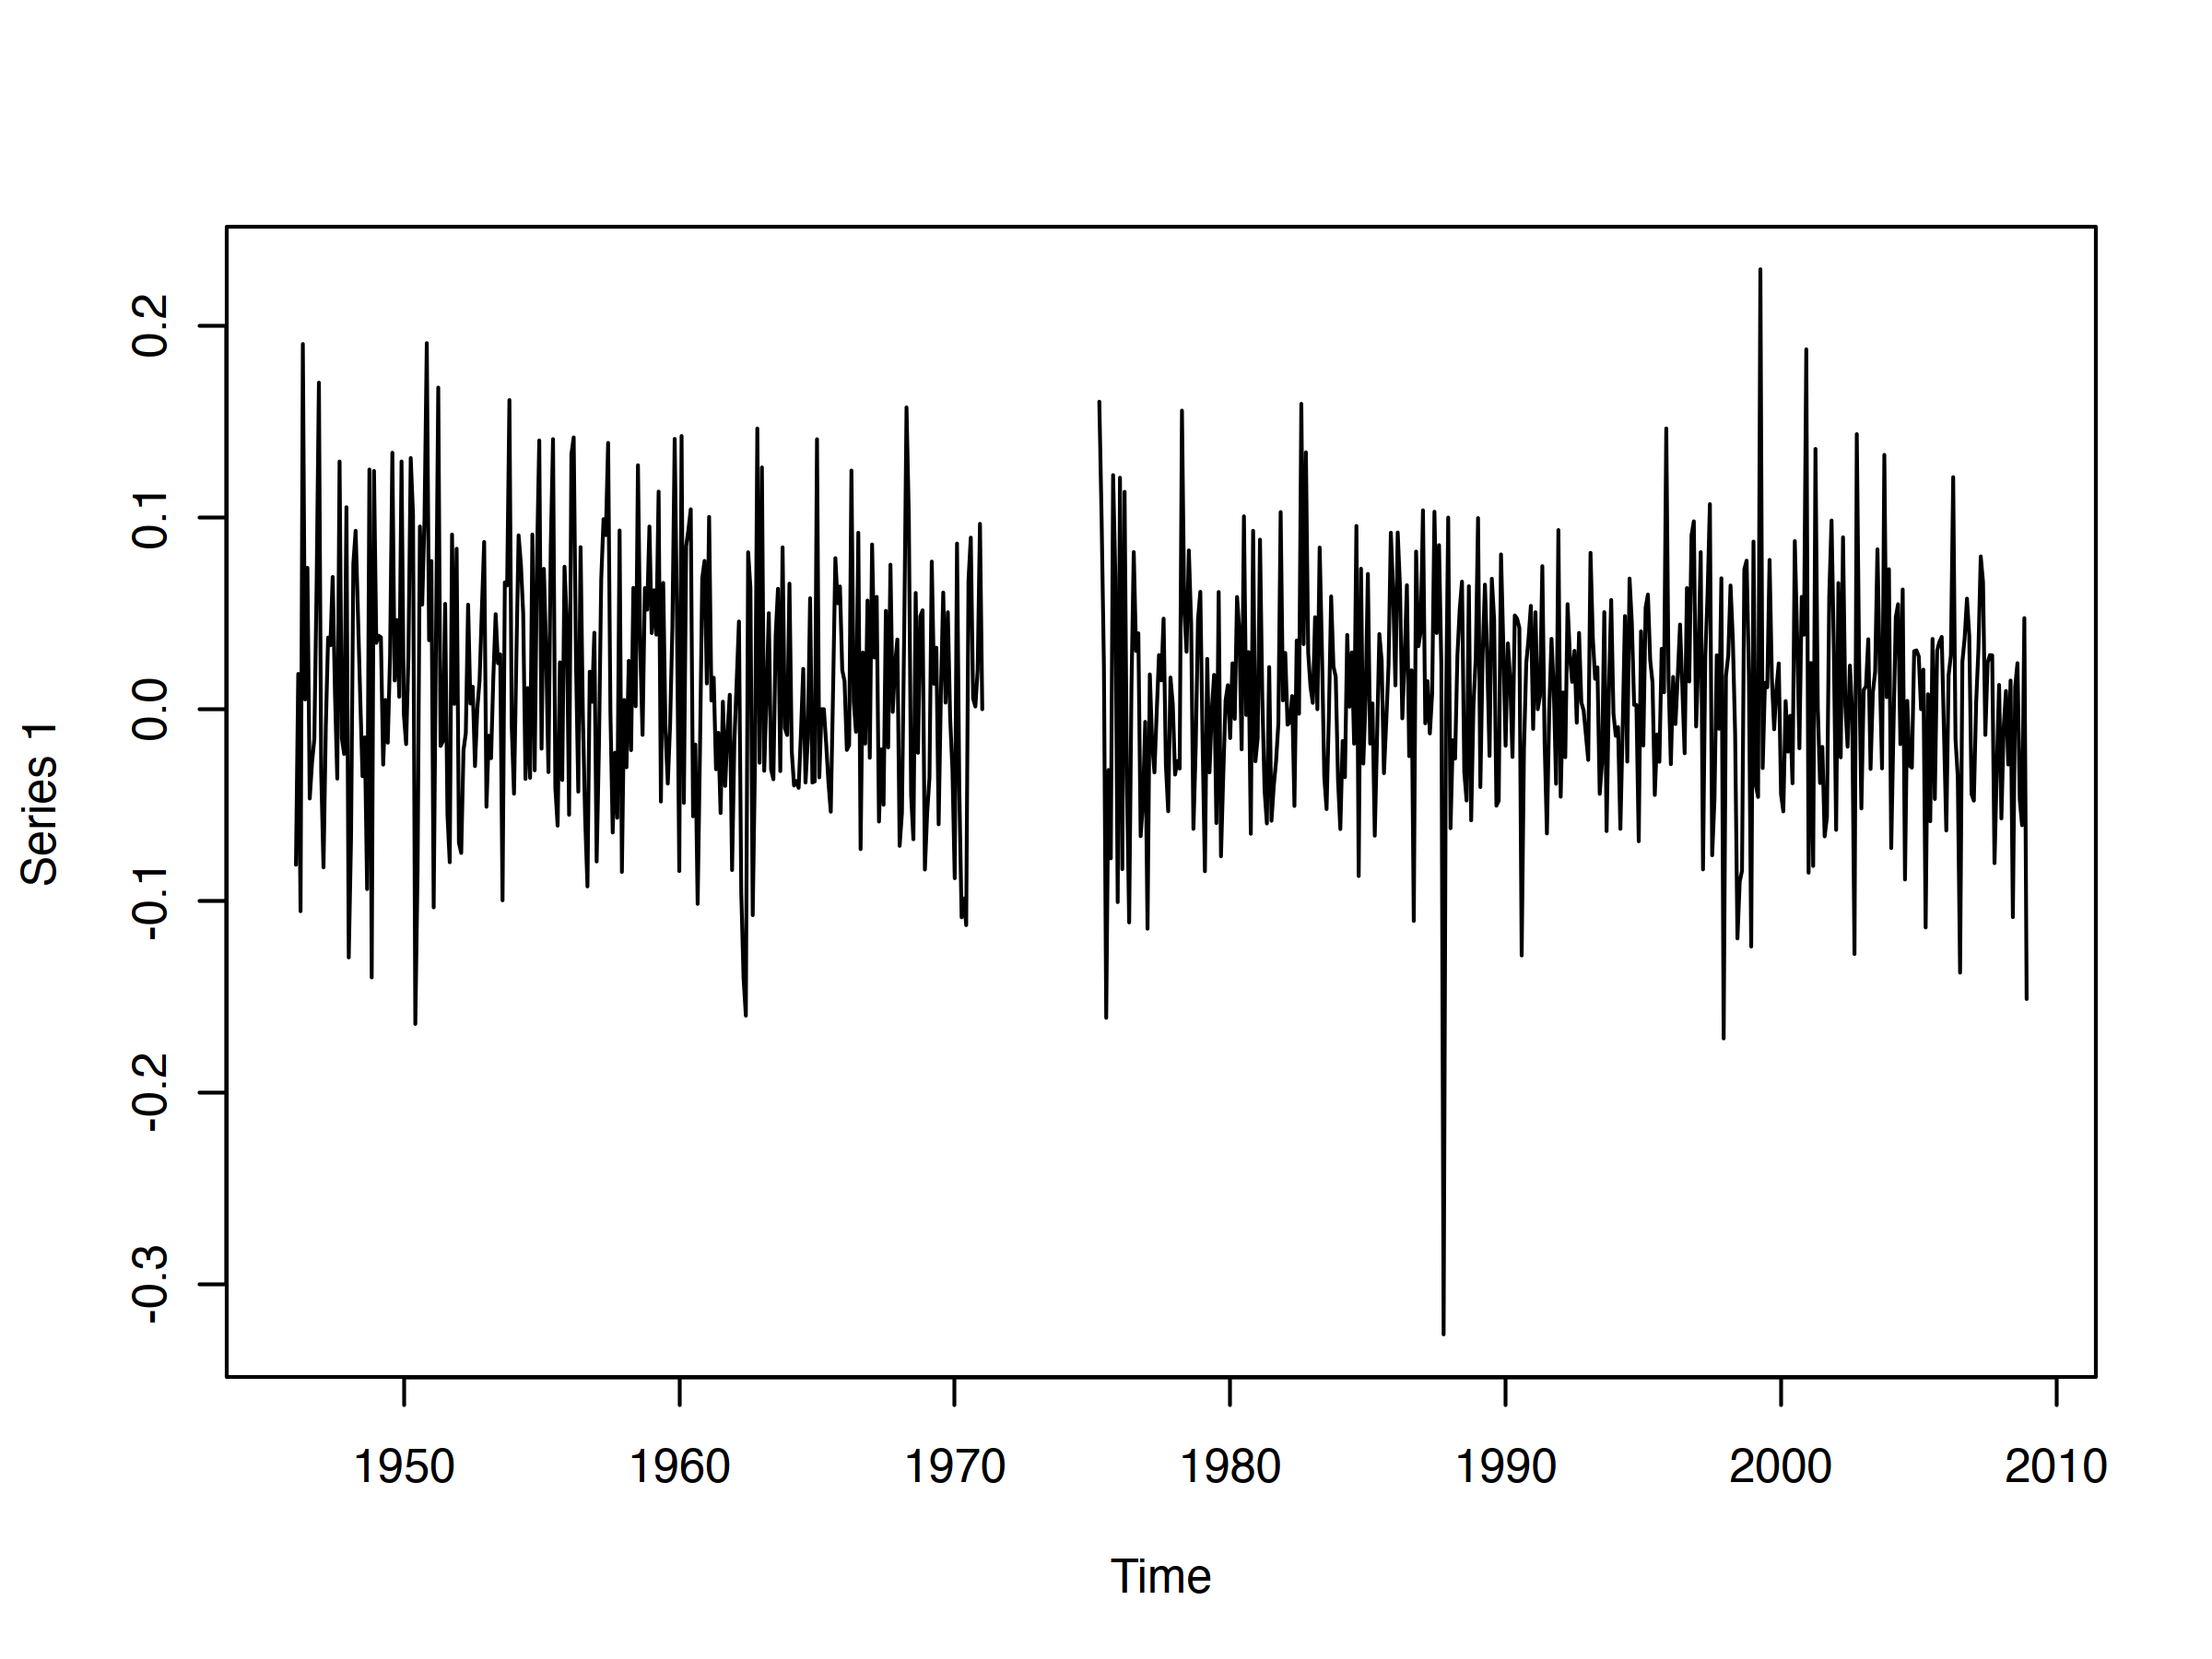

In [21]:
ts.3m.miss <- ts.3m
ts.3m.miss[301:350] <- NA
plot(ts.3m.miss)

In [ ]:
arima(
  ts.3m.miss,
  order = c(3, 0, 1),
  seasonal = list(order = c(1, 0, 1), period = 12)
)

# Call:
# arima(x = ts.3m.miss, order = c(3, 0, 1), seasonal = list(order = c(1, 0, 1), 
#     period = 12))

# Coefficients:
#          ar1      ar2      ar3      ma1    sar1     sma1  intercept
#       0.1638  -0.0369  -0.0977  -0.2174  0.7152  -0.6368     0.0107
# s.e.  0.2187   0.0400   0.0407   0.2176  0.2258   0.2481     0.0024

# sigma^2 estimated as 0.003841:  log likelihood = 960.01,  aic = -1904.02


Call:
arima(x = ts.3m.miss, order = c(3, 0, 1), seasonal = list(order = c(1, 0, 1), 
    period = 12))

Coefficients:
         ar1      ar2      ar3      ma1    sar1     sma1  intercept
      0.1638  -0.0369  -0.0977  -0.2174  0.7152  -0.6368     0.0107
s.e.  0.2187   0.0400   0.0407   0.2176  0.2258   0.2481     0.0024

sigma^2 estimated as 0.003841:  log likelihood = 960.01,  aic = -1904.02